# Detect output

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Use celldetect notebook to create files!

In [2]:
##jupyter nbconvert --to script celldetect.ipynb

In [3]:
bash celldetect.sh
##REGRESSION_TEST: bash $CIAOTEST_TESTS/threads/celldetect.MAIN


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      229 Mb  ####################            3 s  72742.3 kb/s
  evt2     fits       23 Mb  ####################          < 1 s  47325.0 kb/s
  asol     fits       20 Mb  ####################          < 1 s  76709.0 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  24962.7 kb/s
  stat     fits        3 Mb  ####################          < 1 s  39414.0 kb/s
  aqual    fits        1 Mb  ####################          < 1 s  40222.0 kb/s
  bias     fits      494 Kb  ####################          < 1 s  23429.7 kb/s
  bias     fits      433 Kb  ####################          < 1 s  25003.4 kb/s
  bias     fits      431 Kb  ####################          < 1 s  13053.4 kb/s
  bias     fits      430 Kb  ####################          < 1 s  21721.3 kb/s
  bias     fits      429 Kb  ####################    

    (findpeaks = yes)             Find local peaks?
     (centroid = yes)             Compute source centroids?
     (ellsigma = 3)               Size of output source ellipses (in sigmas)
     (expratio = 0)               cutoff ratio for source cell exposure variation
#
#   detect cell size parameters
#
    (fixedcell = 12)              Fixed cell size to use (0 for variable cell)
      (xoffset = INDEF)           Offset of x axis from data center
      (yoffset = INDEF)           Offset of y axis from data center
     (cellfile = )                Output cell size image stack name
(maxlogicalwindow = 8192)            Max logical window
#
#   background parameters
#
      (bkgfile = )                Background file name
     (bkgvalue = 0)               Background count/pixel
  (bkgerrvalue = 0)               Background error
#
#   using defaults is recommended here
#
     (convolve = no)              Use convolution?
      (snrfile = )                SNR output file name (for convolu

[1] 45330
[1]+  Done                    ds9 s3_broad_thresh.img -log -region s3_src.fits -zoom to fit -saveimage png ds9_1.png
XPA$ERROR no 'xpaset' access points match template: ds9


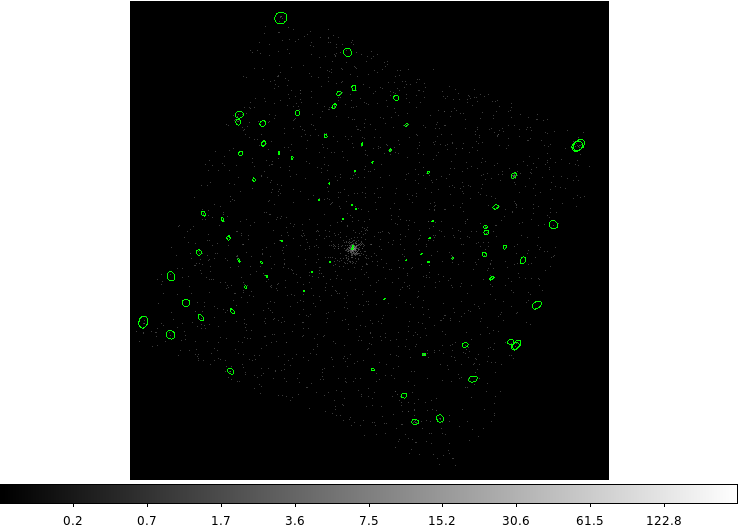

In [4]:
ds9 s3_broad_thresh.img -log -region s3_src.fits -zoom to fit -saveimage png ds9_1.png &
sleep 10
xpaset -p ds9 quit

display < ds9_1.png

## Examing source list

In [5]:
dmlist s3_src.fits blocks

 
--------------------------------------------------------------------------------
Dataset: s3_src.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SRCLIST                        Table        31 cols x 82       rows


In [6]:
dmlist "s3_src.fits[cols RA,DEC,POS]" data

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    RA                   DEC                  POS(X,Y)
 
     1       212.8476582345        52.2254818222 (     4007.2824601367,     4248.8496583144)
     2       212.8363474221        52.2021515227 (     4057.9585798817,     4078.1301775148)
     3       212.8356429371        52.2027046910 (     4061.1182608696,     4082.1773913043)
     4       212.8351854747        52.2031801937 (     4063.1700680272,     4085.6564625850)
     5        212.835175130        52.2044274344 (     4063.2173913043,     4094.7826086957)
     6       212.8068074149        52.2280851890            (     4190.3750,     4267.90)
     7       212.8876399831        52.1840455522 (     3827.8292682927,     3945.7560975610)
     8       212.8785268016        52.2399219944       (     3869.0,     4354.5769230769)
     9 

## Manipulate


In [7]:
dmcopy "s3_src.fits[#row=1:11,13:15]" s3_1gone_src.fits cl+
dmlist s3_1gone_src.fits blocks

 
--------------------------------------------------------------------------------
Dataset: s3_1gone_src.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SRCLIST                        Table        31 cols x 14       rows


[1] 45381
[1]+  Done                    ds9 s3_broad_thresh.img -log -region s3_1gone_src.fits -zoom to fit -saveimage png ds9_2.png


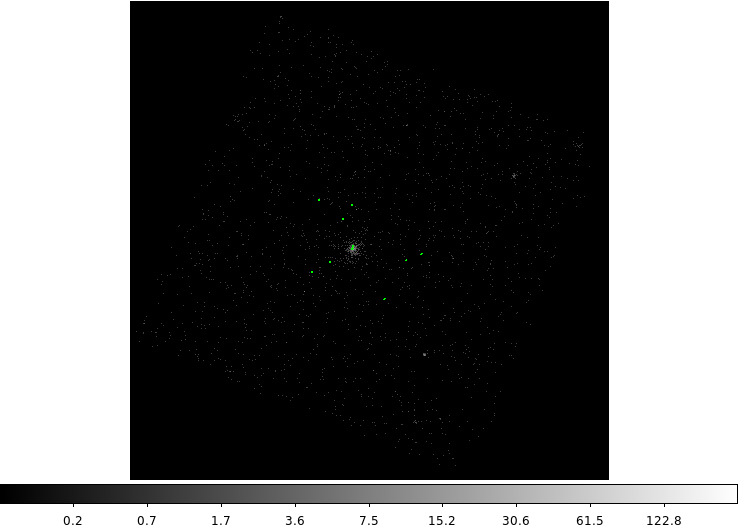

In [8]:
ds9 s3_broad_thresh.img -log -region s3_1gone_src.fits -zoom to fit -saveimage png ds9_2.png &
sleep 10
xpaset -p ds9 quit

display < ds9_2.png

In [9]:
dmcopy "s3_src.fits[#row=1:7,9:11,13,15]" s3_3gone_src.fits clob+

dmlist s3_3gone_src.fits blocks


 
--------------------------------------------------------------------------------
Dataset: s3_3gone_src.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SRCLIST                        Table        31 cols x 12       rows


In [10]:
dmlist s3_3gone_src.fits"[cols ra,dec,net_counts]" data

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    RA                   DEC                  NET_COUNTS
 
     1       212.8476582345        52.2254818222              817.250
     2       212.8363474221        52.2021515227             76.18750
     3       212.8356429371        52.2027046910            383.18750
     4       212.8351854747        52.2031801937            149.43750
     5        212.835175130        52.2044274344             27.43750
     6       212.8068074149        52.2280851890             33.81250
     7       212.8876399831        52.1840455522                 41.0
     8       212.8642377752        52.1920851480       150.2857208252
     9       212.8627836443        52.2375340642                 32.0
    10       212.8362611313        52.2364541516                 24.0
    11       212.7952915390        52.16320

## Sort

In [11]:
dmlist "s3_src.fits[cols net_counts]" data

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    NET_COUNTS
 
     1              817.250
     2             76.18750
     3            383.18750
     4            149.43750
     5             27.43750
     6             33.81250
     7                 41.0
     8        23.4285717010
     9       150.2857208252
    10                 32.0
    11                 24.0
    12       301.8571472168
    13                 20.0
    14        22.7142848969
    15        68.4285736084
    16        23.0795459747
    17                 36.0
    18        29.0795459747
    19        37.2386360168
    20        90.3977279663
    21                 22.0
    22        45.0795440674
    23                 19.0
    24        62.1428565979
    25        36.1428565979
    26        35.7142868042
    27       102.2857131958
    28                 24.0
 

In [12]:
dmsort s3_src.fits s3_sorted_src.fits keys=net_counts copyall=yes cl+

dmlist "s3_sorted_src.fits[cols net_counts]" data
 

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    NET_COUNTS
 
     1        18.8974990845
     2                 19.0
     3        19.1590900421
     4                 20.0
     5                 22.0
     6                 22.0
     7        22.5900001526
     8        22.7142848969
     9        23.0795459747
    10        23.4285717010
    11                 24.0
    12                 24.0
    13        25.0774993896
    14        25.6363639832
    15        26.2386360168
    16        26.7916660309
    17        27.2824993134
    18             27.43750
    19        27.7700004578
    20        29.0795459747
    21        29.6924991608
    22        31.3850002289
    23                 32.0
    24        32.3977279663
    25        33.0758628845
    26        33.3849983215
    27             33.81250
    28        34.4151802063
 

In [13]:
dmsort s3_src.fits s3_descend_src.fits keys=-net_counts

dmlist "s3_descend_src.fits[cols net_counts]" data
 

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    NET_COUNTS
 
     1              817.250
     2       771.3068237305
     3       712.4091186523
     4            383.18750
     5       301.8571472168
     6       238.1931762695
     7       216.7001495361
     8       214.9545440674
     9       174.9166717529
    10       170.7196502686
    11       150.2857208252
    12            149.43750
    13       144.3742675781
    14       128.0896606445
    15                116.0
    16       114.5862045288
    17       106.1931838989
    18       102.2857131958
    19        90.3977279663
    20        78.8724975586
    21             76.18750
    22        73.5714263916
    23        68.7699966431
    24        68.4285736084
    25        68.0551757812
    26               65.750
    27        62.1428565979
    28        57.8078460693
 

## Filtering 

In [14]:
dmcopy "s3_src.fits[net_counts=40:]" s3_40cts_src.fits cl+
dmlist "s3_40cts_src.fits[cols net_counts]" data

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    NET_COUNTS
 
     1              817.250
     2             76.18750
     3            383.18750
     4            149.43750
     5                 41.0
     6       150.2857208252
     7       301.8571472168
     8        68.4285736084
     9        90.3977279663
    10        45.0795440674
    11        62.1428565979
    12       102.2857131958
    13        73.5714263916
    14                 40.0
    15               65.750
    16              52.8750
    17       214.9545440674
    18       238.1931762695
    19       771.3068237305
    20        47.3977279663
    21        78.8724975586
    22        68.7699966431
    23        68.0551757812
    24       128.0896606445
    25        55.0965499878
    26       106.1931838989
    27       712.4091186523
    28        46.3333320618
 

In [15]:
dmcopy "s3_src.fits[net_counts=25:80]" s3_25-80cts_src.fits cl+
dmlist "s3_25-80cts_src.fits[cols net_counts]" data

 
--------------------------------------------------------------------------------
Data for Table Block SRCLIST
--------------------------------------------------------------------------------
 
ROW    NET_COUNTS
 
     1             76.18750
     2             27.43750
     3             33.81250
     4                 41.0
     5                 32.0
     6        68.4285736084
     7                 36.0
     8        29.0795459747
     9        37.2386360168
    10        45.0795440674
    11        62.1428565979
    12        36.1428565979
    13        35.7142868042
    14        73.5714263916
    15                 40.0
    16               65.750
    17              52.8750
    18        34.7916679382
    19        32.3977279663
    20        25.6363639832
    21        26.2386360168
    22        39.7159080505
    23        47.3977279663
    24        78.8724975586
    25        29.6924991608
    26        33.3849983215
    27        27.2824993134
    28        68.7699966431
 

## Convert coords

### ds9


In [16]:
echo skip

skip


### precess

In [17]:
dmlist s3_src.fits"[cols ra,dec]" data,clean > decimal.txt

prop_precess f j2000/deg t j2000/hms : decimal.txt : hms.txt

Opened input file decimal.txt
Opened output file hms.txt


In [18]:
cat hms.txt

RA,Dec J2000.0                          RA,Dec J2000.0
212.847658    52.225482                 14 11 23.44 +52 13 31.73
212.836347    52.202152                 14 11 20.72 +52 12 07.75
212.835643    52.202705                 14 11 20.55 +52 12 09.74
212.835185    52.203180                 14 11 20.44 +52 12 11.45
212.835175    52.204427                 14 11 20.44 +52 12 15.94
212.806807    52.228085                 14 11 13.63 +52 13 41.11
212.887640    52.184046                 14 11 33.03 +52 11 02.56
212.878527    52.239922                 14 11 30.85 +52 14 23.72
212.864238    52.192085                 14 11 27.42 +52 11 31.51
212.862784    52.237534                 14 11 27.07 +52 14 15.12
212.836261    52.236454                 14 11 20.70 +52 14 11.23
212.831226    52.233462                 14 11 19.49 +52 14 00.46
212.795292    52.163200                 14 11 10.87 +52 09 47.52
212.768217    52.193196                 14 11 04.37 +52 11 35.51
212.748301    52.198181            

## Using srclist in Analysis

### Single Spectra

In [22]:
evt=2254/primary/acisf02254N004_evt2.fits.gz

punlearn dmextract

dmextract "${evt}[sky=region(s3_src.fits[#row=2])][bin pi=::1]" \
      spectrum.fits cl+


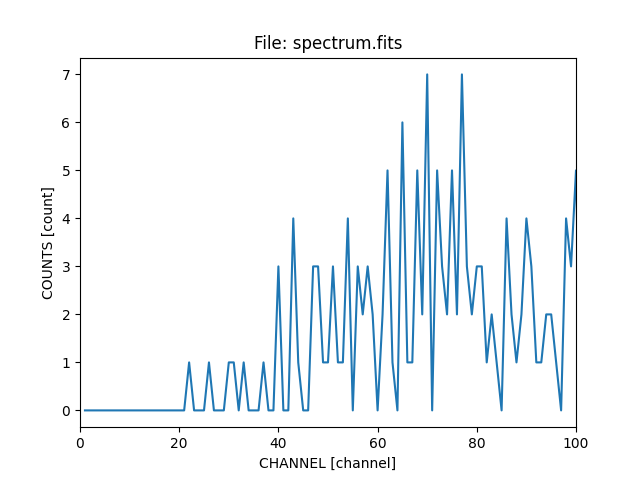

In [23]:

cat << EOM > p1.py
from pycrates import read_file
import matplotlib.pyplot as plt

tab = read_file("spectrum.fits")
xcol = tab.get_column("channel")
ycol = tab.get_column("counts")

def mklabel(col):
    lab = col.name
    if hasattr(col, "unit") and len(col.unit)>0:
        lab = lab + ' [{}]'.format(col.unit)
    return(lab)

xlab=mklabel(xcol)
ylab=mklabel(ycol)

plt.plot(xcol.values, ycol.values)
plt.xlim(0, 100)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("File: spectrum.fits")
plt.savefig("plot1.png")
EOM

python p1.py

display < plot1.png

### Multiple, type II

In [24]:
dmextract "${evt}[sky=region(s3_src.fits[component=igrid(1:15:1)])][bin pi=::1]" \
      multi_spectra_phaII.fits op=pha2 clob+


In [25]:
dmlist multi_spectra_phaII.fits blocks

 
--------------------------------------------------------------------------------
Dataset: multi_spectra_phaII.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table         7 cols x 15       rows
Block    3: GTI3                           Table         2 cols x 3        rows
Block    4: GTI6                           Table         2 cols x 5        rows
Block    5: GTI7                           Table         2 cols x 1        rows
Block    6: GTI2                           Table         2 cols x 6        rows
Block    7: GTI1                           Table         2 cols x 3        rows
Block    8: GTI0                           Table         2 cols x 3        rows


### Co-add spectra

In [26]:
dmcopy "s3_src.fits[#row=1:2,6:]" s3_nocore_src.fits cl+

In [27]:
dmextract "${evt}[sky=region(s3_nocore_src.fits)][bin pi=::1]" \
      spectrum_faint.fits cl+

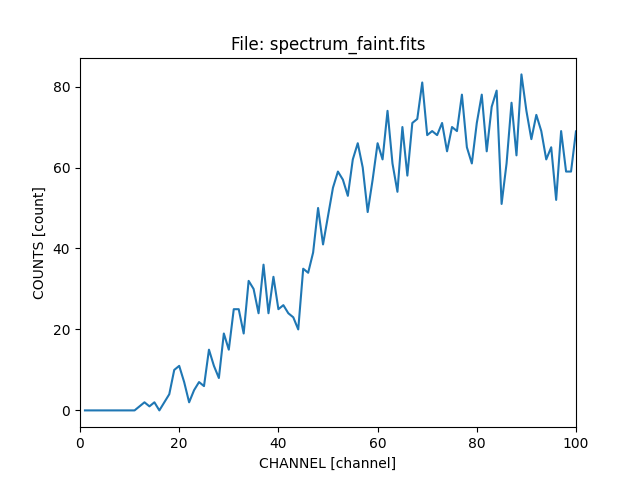

In [28]:

cat << EOM > p2.py
from pycrates import read_file
import matplotlib.pyplot as plt

tab = read_file("spectrum_faint.fits")
xcol = tab.get_column("channel")
ycol = tab.get_column("counts")

def mklabel(col):
    lab = col.name
    if hasattr(col, "unit") and len(col.unit)>0:
        lab = lab + ' [{}]'.format(col.unit)
    return(lab)

xlab=mklabel(xcol)
ylab=mklabel(ycol)

plt.plot(xcol.values, ycol.values)
plt.xlim(0,100)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("File: spectrum_faint.fits")
plt.savefig("plot2.png")
EOM

python p2.py

display < plot2.png

## Remove pt srcs

In [29]:
dmcopy "s3_src.fits[#row=1:2,6:15]" s3_holes_src.fits cl+

In [30]:
dmcopy "${evt}[exclude sky=region(s3_holes_src.fits)]" s3_holes_evt2.fits cl+

[1] 46692
[1]+  Done                    ds9 s3_holes_evt2.fits"[events,ccd_id=0:3]" -log -bin factor 4 -saveimage png ds9_3.png


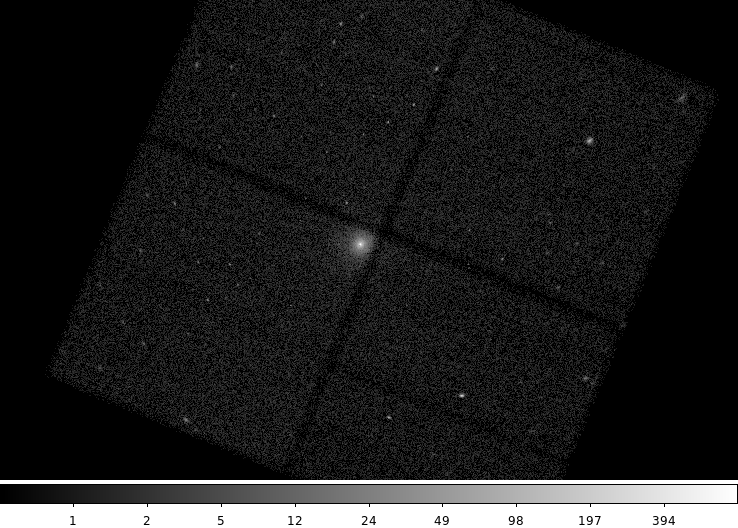

In [34]:
ds9 s3_holes_evt2.fits"[events,ccd_id=0:3]" -log -bin factor 4 -saveimage png ds9_3.png &
sleep 10
xpaset -p ds9 quit

display < ds9_3.png

## As catalog


[1] 46325
[1]+  Done                    ds9 s3_broad_thresh.img -log -zoom to fit -catalog import fits s3_expmap_src.fits -saveimage png ds9_4.png


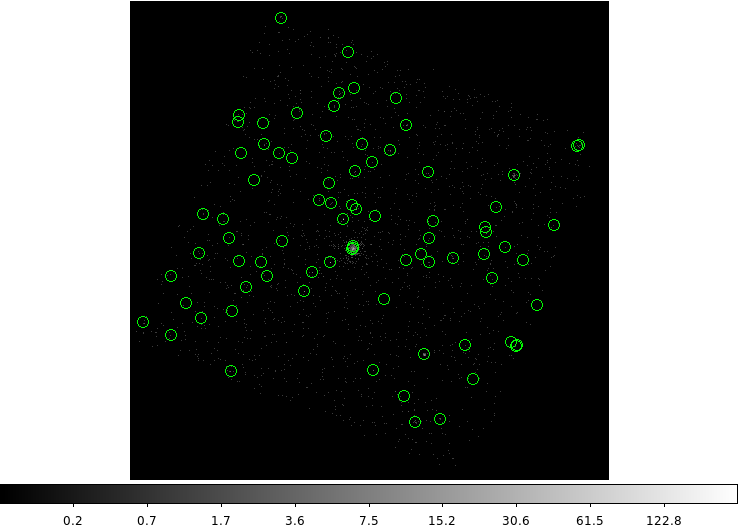

In [32]:
ds9 s3_broad_thresh.img -log -zoom to fit -catalog import fits s3_expmap_src.fits -saveimage png ds9_4.png &
sleep 10
xpaset -p ds9 quit

display < ds9_4.png

### Cross match with 2MASS
    It's too hard to do the cross match stuff via notebook.  But one could it via xpa commands if you really wanted too.

# Cleanup

In [33]:
/bin/rm -rf 1522 578
/bin/rm -f bin*.img bin*.expmap 
/bin/rm -f s3*img s3*expmap
